<a href="https://colab.research.google.com/github/jvataidee/DataScience/blob/master/Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_7cbf8aa255ec468a97ab036d55c121c3~mv2.png/v1/fill/w_408,h_86,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2013%404x.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#Análise dos dados de vendas de Games
---
<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_3dd12d9a66eb4304a40153e3c98a184e~mv2.jpg" height="400px"></p>

#Importando dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#configurações de gráficos
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
df = 'https://raw.githubusercontent.com/jvataidee/vendas_games/master/games.csv'

In [ ]:
games = pd.read_csv(df)

In [ ]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


#Análises básicas

##Quais os tipos de dados?

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


##Quais são os valores faltantes?

In [ ]:
games.isnull().sum()/games.shape[0]*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.000000
Genre           0.000000
Publisher       0.220534
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [ ]:
games.dropna(inplace = True)

#Quais as produções de jogos no tempo?


In [ ]:
games_new = games["Year"].value_counts().sort_values()

In [ ]:
games_new.describe()

count      37.000000
mean      440.216216
std       452.304478
min         9.000000
25%        36.000000
50%       338.000000
75%       744.000000
max      1433.000000
Name: Year, dtype: float64

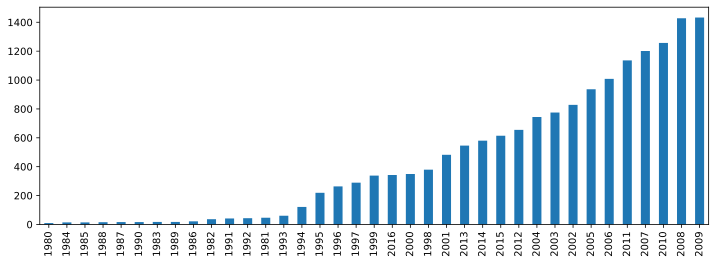

In [ ]:
games_new.plot(kind ="bar", figsize=(12,4));

#Quais anos que mais venderam no mundo?

#Quais os generos mais vendido no mundo?

In [ ]:
games_genero = games.Genre.value_counts().sort_values()

In [ ]:
games_genero.describe()

count      12.000000
mean     1357.333333
std       767.815121
min       570.000000
25%       845.000000
50%      1249.500000
75%      1522.500000
max      3250.000000
Name: Genre, dtype: float64

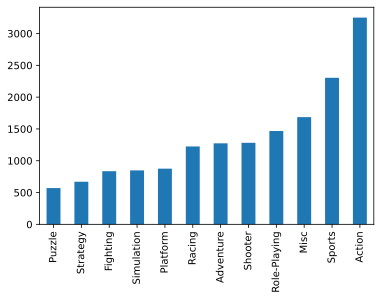

In [ ]:
games_genero.plot(kind = "bar")
plt.xticks();

#Qual o genero mais vendido?

#Qual produtora mais vendeu?

#Qual a produtora que mais fez jogos?

In [ ]:
games_plubli = games.iloc[:, 5:6]

In [ ]:
games_plubli['nova_coluna'] = 1

In [ ]:
games_publi = games_plubli.groupby(['Publisher']).count()

In [ ]:
games_pc = games_publi[games_publi.nova_coluna > 80]

In [ ]:
games_pc = games_pc.sort_values(by='nova_coluna')

In [ ]:
games_pc.describe()

,nova_coluna
count,33.000000
mean,369.121212
std,331.372313
min,81.000000
25%,127.000000
50%,196.000000
75%,630.000000
max,1339.000000


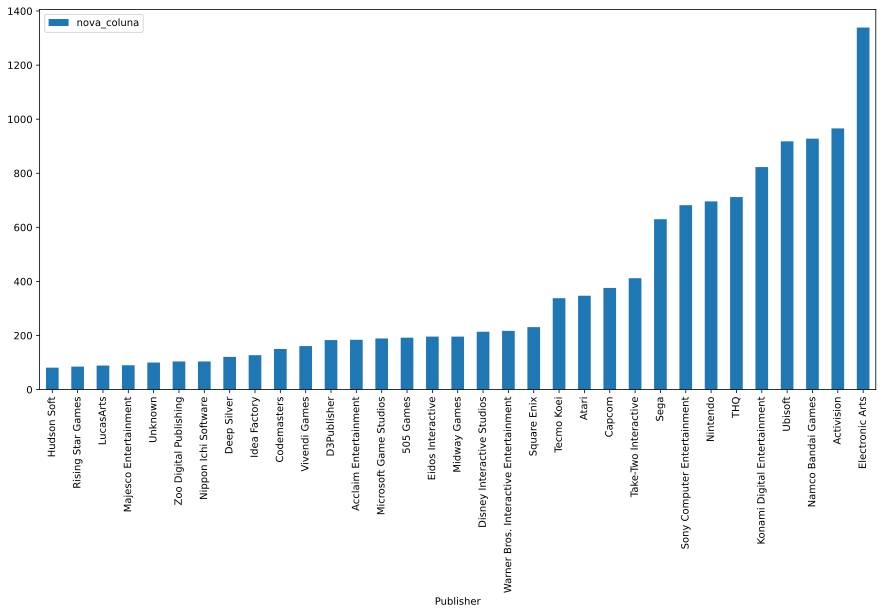

In [ ]:
games_pc.plot(kind = "bar", figsize=(15,7),style = 'Blues')
plt.xticks(fontsize=10);

#Quais jogos mais vendidos?